<a href="https://colab.research.google.com/github/Ekaterina-31/Kursovaya-Chemical-Compounds/blob/main/8_ML_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_SI_%3E_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация: превышает ли значение SI значение 8

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Загрузка датасета

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/8 Классическое МО (ML)/Курсовая работа Хим соединения/df.xlsx')
df

,"IC50, mM","CC50, mM",SI,"IC50, mM_log","CC50, mM_log",SI_log,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Chi,Kappa,PEOE_VSA,SMR_VSA,SlogP_VSA,EState_VSA,VSA_EState
0,6.239374,175.482382,28.125000,1.979535,5.173221,3.371597,0.203662,0.203662,0.281677,0.881996,...,0,0.15,0,6.244950,0.872278,1.849596,1.656534,1.409310,1.363038,3.212521
1,0.771831,5.402819,7.000000,0.572014,1.856738,2.079442,0.120448,0.120448,0.388360,0.899521,...,0,0.15,0,6.601003,0.914682,1.350636,1.564823,1.654294,1.111547,3.036357
2,223.808778,161.142320,0.720000,5.415250,5.088474,0.542324,0.022420,0.022420,0.395171,0.900640,...,0,0.15,0,8.046121,1.065814,2.125484,1.729382,1.507932,1.261023,3.605910
3,1.705624,107.855654,63.235294,0.995333,4.690023,4.162553,0.203902,0.203902,0.284134,0.882400,...,0,0.20,0,6.474522,0.955535,1.899410,1.693357,1.444191,1.386790,3.236238
4,107.131532,139.270991,1.300000,4.683348,4.943576,0.832909,0.207807,0.207807,0.196742,0.868043,...,0,0.00,0,7.283966,1.008745,2.041540,2.036026,2.085103,1.578446,3.844661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,3.465739,3.583509,0.755660,0.779703,0.779703,0.034912,0.778814,...,0,0.00,0,6.341904,0.771707,1.858068,1.899974,2.107205,1.926522,3.177215
997,31.999934,33.999415,1.062484,3.496506,3.555331,0.723911,0.831164,0.831164,0.022036,0.752137,...,0,0.00,0,7.167030,1.037718,2.343830,2.191027,2.471311,2.163199,3.334032
998,30.999883,33.999458,1.096761,3.465732,3.555333,0.740394,0.857343,0.857343,0.019276,0.757941,...,0,0.00,0,7.909882,1.261307,2.678913,2.474751,2.781308,2.369348,3.486369
999,31.998959,32.999644,1.031272,3.496476,3.526350,0.708662,0.845478,0.845478,0.106566,0.667368,...,0,0.00,0,7.060575,1.358744,2.691922,2.348154,2.608160,2.111231,3.344150


## Подготовка данных для обучения модели

In [ ]:
y = (df['SI'] > 8).astype(int)
y

,SI
0,1
1,0
2,0
3,1
4,0
...,...
996,0
997,0
998,0
999,0


In [ ]:
# исключаем прочие целевые переменные
X = df.drop(columns=['IC50, mM', 'CC50, mM', 'SI', 'IC50, mM_log', 'CC50, mM_log', 'SI_log'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Test dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (800, 129), (800,)
Test dataset size: (201, 129), (201,)


## Выбор лучшей модели без гиперпараметров

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
# Список моделей
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(),
    # "SVM": SVC(),
}

In [ ]:
%%time
import warnings
warnings.filterwarnings("ignore")

scores = []
predictions = {}

for model_name, model in models.items():
    res = {}

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

    res["model"] = model_name
    res["roc_auc"] = roc_auc_score(y_test, y_pred)
    res["accuracy"] = accuracy_score(y_test, y_pred)
    res["recall"] = recall_score(y_test, y_pred, average="weighted")
    res["precision"] = precision_score(y_test, y_pred, average="weighted")
    res["f1"] = f1_score(y_test, y_pred, average="weighted")

    scores.append(res)

scores = pd.DataFrame(scores)

Learning rate set to 0.009366
0:	learn: 0.6907498	total: 62ms	remaining: 1m 1s
1:	learn: 0.6883275	total: 73.3ms	remaining: 36.6s
2:	learn: 0.6858067	total: 84.6ms	remaining: 28.1s
3:	learn: 0.6836846	total: 95.7ms	remaining: 23.8s
4:	learn: 0.6812432	total: 107ms	remaining: 21.3s
5:	learn: 0.6785081	total: 118ms	remaining: 19.5s
6:	learn: 0.6763729	total: 129ms	remaining: 18.3s
7:	learn: 0.6744827	total: 142ms	remaining: 17.6s
8:	learn: 0.6720364	total: 153ms	remaining: 16.9s
9:	learn: 0.6699330	total: 164ms	remaining: 16.3s
10:	learn: 0.6677548	total: 176ms	remaining: 15.8s
11:	learn: 0.6655260	total: 187ms	remaining: 15.4s
12:	learn: 0.6626887	total: 200ms	remaining: 15.2s
13:	learn: 0.6609796	total: 212ms	remaining: 15s
14:	learn: 0.6583797	total: 224ms	remaining: 14.7s
15:	learn: 0.6563343	total: 235ms	remaining: 14.4s
16:	learn: 0.6540709	total: 246ms	remaining: 14.2s
17:	learn: 0.6527496	total: 263ms	remaining: 14.3s
18:	learn: 0.6502216	total: 292ms	remaining: 15.1s
19:	learn: 

In [ ]:
scores

,model,roc_auc,accuracy,recall,precision,f1
0,Decision Tree,0.663114,0.701493,0.701493,0.695201,0.697202
1,Random Forest,0.664729,0.711443,0.711443,0.702558,0.703331
2,KNN,0.638243,0.661692,0.661692,0.666024,0.663599
3,CatBoost,0.691053,0.741294,0.741294,0.734423,0.731251


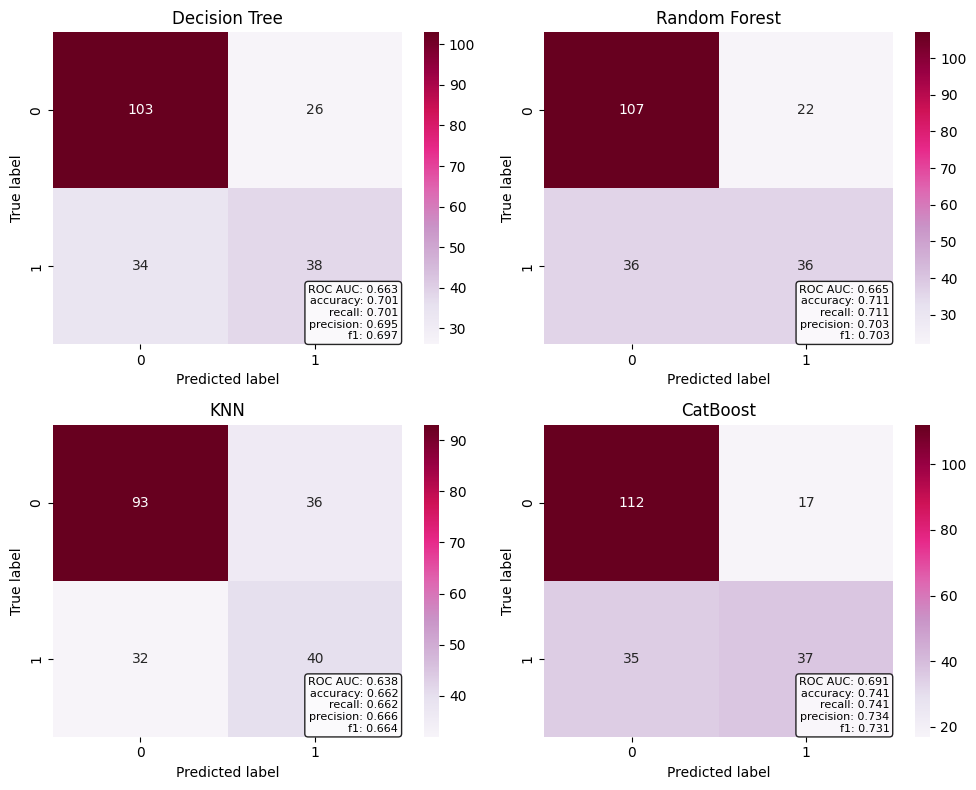

In [ ]:
import math
from sklearn.metrics import confusion_matrix

n_models = len(models)
n_cols = 2
n_rows = math.ceil(n_models / n_cols)  # автоматически вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), dpi=100)
axes = axes.flatten()

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='PuRd',
        ax=ax,
        xticklabels=['0', '1'],
        yticklabels=['0', '1']
    )
    ax.set_title(name)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)

    # Текст метрик
    metrics_text = (f"ROC AUC: {roc_auc:.3f}\n"
                    f"accuracy: {accuracy:.3f}\n"
                    f"recall: {recall_weighted:.3f}\n"
                    f"precision: {precision_weighted:.3f}\n"
                    f"f1: {f1_weighted:.3f}")

    ax.text(
        0.99, 0.01, metrics_text,
        transform=ax.transAxes,
        va='bottom', ha='right',
        fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white',
                  edgecolor='black',
                  alpha=0.85)
    )

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

## Выбор лучшей модели с гиперпараметрами

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from skopt import BayesSearchCV

# Список моделей и их гиперпараметров
models = {
    "DecisionTree": (DecisionTreeClassifier(), {
        'max_depth': (1, 20),
        'min_samples_split': (10, 20),
    }),
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': (50, 250),
        'max_depth': (1, 20),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 8),
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': (1, 20),
        'weights': ['uniform', 'distance'],
    }),
    "CatBoost": (CatBoostClassifier(), {
        'n_estimators': (400, 550),
        'depth': (1, 15),
    }),
}

In [ ]:
%%time
# Перебор моделей
best_model = None
best_score = -float("inf")
best_params = {}

results = []

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    return {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

for name, (model, params) in models.items():

    # Байесовская оптимизация гиперпараметров
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=params,
        n_iter=15,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    # Обучение модели
    bayes_search.fit(X_train, y_train)

    y_pred = bayes_search.predict(X_test)

    scores = evaluate_model(y_test, y_pred)

    # Проверка, стала ли эта модель лучшей
    if bayes_search.best_score_ > best_score:
        best_score = bayes_search.best_score_
        best_model = name
        best_params = bayes_search.best_params_

    results.append({
    'Модель': name,
    'ROC AUC': bayes_search.best_score_,
    'accuracy': scores['accuracy'],
    'recall': scores['recall'],
    'precision': scores['precision'],
    'f1': scores['f1'],
    'Гиперпараметры': bayes_search.best_params_,
    })

Learning rate set to 0.016536
0:	learn: 0.6886834	total: 63.5ms	remaining: 34.1s
1:	learn: 0.6831268	total: 85.3ms	remaining: 22.8s
2:	learn: 0.6789204	total: 105ms	remaining: 18.7s
3:	learn: 0.6751719	total: 124ms	remaining: 16.6s
4:	learn: 0.6704642	total: 144ms	remaining: 15.3s
5:	learn: 0.6662557	total: 163ms	remaining: 14.5s
6:	learn: 0.6620075	total: 183ms	remaining: 13.9s
7:	learn: 0.6577901	total: 208ms	remaining: 13.8s
8:	learn: 0.6531953	total: 228ms	remaining: 13.4s
9:	learn: 0.6503751	total: 248ms	remaining: 13.1s
10:	learn: 0.6456218	total: 267ms	remaining: 12.8s
11:	learn: 0.6420180	total: 288ms	remaining: 12.6s
12:	learn: 0.6375754	total: 308ms	remaining: 12.4s
13:	learn: 0.6350372	total: 327ms	remaining: 12.3s
14:	learn: 0.6325160	total: 355ms	remaining: 12.4s
15:	learn: 0.6296420	total: 375ms	remaining: 12.2s
16:	learn: 0.6255585	total: 394ms	remaining: 12.1s
17:	learn: 0.6225123	total: 416ms	remaining: 12s
18:	learn: 0.6194580	total: 436ms	remaining: 11.9s
19:	learn: 

In [ ]:
pd.DataFrame(results)

,Модель,ROC AUC,accuracy,recall,precision,f1,Гиперпараметры
0,DecisionTree,0.684125,0.716418,0.716418,0.710068,0.711745,"{'max_depth': 5, 'min_samples_split': 20}"
1,RandomForest,0.752291,0.731343,0.731343,0.723522,0.719341,"{'max_depth': 9, 'min_samples_leaf': 1, 'min_s..."
2,KNN,0.730387,0.676617,0.676617,0.670298,0.672626,"{'n_neighbors': 13, 'weights': 'distance'}"
3,CatBoost,0.754744,0.731343,0.731343,0.723886,0.723791,"{'depth': 7, 'n_estimators': 538}"


In [ ]:
# Вывод лучшей модели
print("Лучшая модель:", best_model)
print("Лучшие параметры:", best_params)
print("Лучший ROC AUC:", best_score)

Лучшая модель: CatBoost
Лучшие параметры: OrderedDict([('depth', 7), ('n_estimators', 538)])
Лучший ROC AUC: 0.7547436552546414


## Подбор гиперпараметров для выбранной модели

In [ ]:
%%time
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Определяем модель
cb_model = CatBoostClassifier(random_state=42)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [400, 500, 550],
    'depth': [4, 6, 8],
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=2, n_jobs=-1, scoring='roc_auc', verbose=2)

# Обучение на данных
grid_search.fit(X_train, y_train)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Learning rate set to 0.0217
0:	learn: 0.6865306	total: 15.5ms	remaining: 6.2s
1:	learn: 0.6820567	total: 26.7ms	remaining: 5.31s
2:	learn: 0.6763818	total: 38.2ms	remaining: 5.05s
3:	learn: 0.6716212	total: 49.5ms	remaining: 4.9s
4:	learn: 0.6673779	total: 62.4ms	remaining: 4.93s
5:	learn: 0.6612198	total: 73.7ms	remaining: 4.84s
6:	learn: 0.6587045	total: 85.1ms	remaining: 4.78s
7:	learn: 0.6545972	total: 96.9ms	remaining: 4.75s
8:	learn: 0.6489363	total: 109ms	remaining: 4.74s
9:	learn: 0.6445444	total: 120ms	remaining: 4.7s
10:	learn: 0.6407166	total: 132ms	remaining: 4.66s
11:	learn: 0.6367540	total: 143ms	remaining: 4.62s
12:	learn: 0.6326602	total: 154ms	remaining: 4.58s
13:	learn: 0.6293882	total: 165ms	remaining: 4.55s
14:	learn: 0.6262771	total: 176ms	remaining: 4.52s
15:	learn: 0.6225282	total: 187ms	remaining: 4.5s
16:	learn: 0.6180935	total: 201ms	remaining: 4.54s
17:	learn: 0.6151002	total: 212ms	remaining: 4.51s


In [ ]:
# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

print(f"Best score (ROC AUC): {best_score:.4f}")

Best parameters found:  {'depth': 6, 'n_estimators': 400}
Best score (ROC AUC): 0.7111


## Предсказание на всех данных

In [ ]:
# сделаем предсказания на тесте
y_pred = best_model.predict(X)

# y - это правильные ответы для X
print(f'ROC AUC: {roc_auc_score(y, y_pred)}')

ROC AUC: 0.8281116794543906
